## News Sentiments

### OBSERVATIONS:
On 12/2/17  19:17 sentiment analysis was completed on most recent 100 tweets by BBC, CNN, CBS, FOX, and NYT.

1. Overall, between all five news outlets there is a greater density of neutral to positively rated tweets/headlines regarding news coverage.

2. Based on average compound scores, CBS and FOX tweet with more positivly perceived headline tweets. CNN tweets with most negative setiments, followed by New York Times. 

3. In a quick scan of headlines tweeted by each media outlet, CNN seems to print less pop-culture/ random factoids as compared to CBS and FOX, as well as BBC which seems to cover world news as well as "tidbits of interest". For a staight forward and bleak view of the world, follow CNN. 




In [1]:
# Dependencies
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from datetime import datetime

from matplotlib.font_manager import FontProperties
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_user = ("@BBC", "@CNN", "@CBS", "@FoxNews", "@nytimes")

counter = 100

sentiments = pd.DataFrame(columns=["Name", "Tweet Count", "Tweet", "Compound Score",
                                   "Positive", "Negative", "Neutral", "Date"])  # Empty Dataframe

for target in target_user:
    #print(f"Tweets for {target}.")
    counter = 100
    for x in range(5):
        response = api.user_timeline(target, page=x)

        for tweet in range(20):

            # Get all tweets from home feed
           # public_tweets = api.user_timeline(target, page=x)
            tweets = response[tweet]["text"]
            name = response[tweet]["user"]["name"]
            date = response[tweet]["created_at"]
            #print(f"Tweet{counter}: {tweets}")
        #print(json.dumps(public_tweets, sort_keys=True, indent=4))
            results = analyzer.polarity_scores(tweets)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            sentiments = sentiments.append({"Name": name, "Tweet": tweets, "Tweet Count": counter,
                                            "Compound Score": compound, "Positive": pos,
                                            "Negative": neg, "Neutral": neu, "Date": date}, ignore_index=True)

            #print(f"tweet{counter}: {name}:{tweets} : {compound}")
            counter -= 1

In [3]:
sentiments

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
0,BBC,100,"RT @BBCRadio2: It may be cold outside, but @BB...",0.3291,0.105,0.000,0.895,Sat Dec 02 21:59:04 +0000 2017
1,BBC,99,You might be carrying a pathogen right now. 😱☣...,0.0000,0.000,0.000,1.000,Sat Dec 02 20:00:05 +0000 2017
2,BBC,98,RT @BBCLookEast: Buddy and his new best bud fr...,0.6369,0.189,0.000,0.811,Sat Dec 02 19:57:21 +0000 2017
3,BBC,97,RT @BBCSport: FT Arsenal 1-3 Man Utd\n\nQuite ...,0.0000,0.000,0.000,1.000,Sat Dec 02 19:49:59 +0000 2017
4,BBC,96,RT @bbcstrictly: Breathtaking! There's just en...,0.5093,0.171,0.000,0.829,Sat Dec 02 19:48:25 +0000 2017
5,BBC,95,Andy's doctor told him to spend time outdoors ...,0.2023,0.195,0.131,0.674,Sat Dec 02 19:30:03 +0000 2017
6,BBC,94,Is body positivity encouraging us to be unheal...,0.5106,0.351,0.178,0.471,Sat Dec 02 18:30:02 +0000 2017
7,BBC,93,6 Hollywood A-listers reveal the secrets behin...,0.0000,0.000,0.000,1.000,Sat Dec 02 18:02:04 +0000 2017
8,BBC,92,A free-riding fox surprised sightseers on a Lo...,0.2263,0.137,0.000,0.863,Sat Dec 02 17:30:05 +0000 2017
9,BBC,91,It's cold out there! Why not warm up with one ...,-0.2401,0.000,0.103,0.897,Sat Dec 02 16:33:03 +0000 2017


In [4]:
sentiments.to_csv("walsh_distingushing_sentiments.csv")

In [5]:
BBC = sentiments.loc[sentiments["Name"] == "BBC"]
BBC

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
0,BBC,100,"RT @BBCRadio2: It may be cold outside, but @BB...",0.3291,0.105,0.000,0.895,Sat Dec 02 21:59:04 +0000 2017
1,BBC,99,You might be carrying a pathogen right now. 😱☣...,0.0000,0.000,0.000,1.000,Sat Dec 02 20:00:05 +0000 2017
2,BBC,98,RT @BBCLookEast: Buddy and his new best bud fr...,0.6369,0.189,0.000,0.811,Sat Dec 02 19:57:21 +0000 2017
3,BBC,97,RT @BBCSport: FT Arsenal 1-3 Man Utd\n\nQuite ...,0.0000,0.000,0.000,1.000,Sat Dec 02 19:49:59 +0000 2017
4,BBC,96,RT @bbcstrictly: Breathtaking! There's just en...,0.5093,0.171,0.000,0.829,Sat Dec 02 19:48:25 +0000 2017
5,BBC,95,Andy's doctor told him to spend time outdoors ...,0.2023,0.195,0.131,0.674,Sat Dec 02 19:30:03 +0000 2017
6,BBC,94,Is body positivity encouraging us to be unheal...,0.5106,0.351,0.178,0.471,Sat Dec 02 18:30:02 +0000 2017
7,BBC,93,6 Hollywood A-listers reveal the secrets behin...,0.0000,0.000,0.000,1.000,Sat Dec 02 18:02:04 +0000 2017
8,BBC,92,A free-riding fox surprised sightseers on a Lo...,0.2263,0.137,0.000,0.863,Sat Dec 02 17:30:05 +0000 2017
9,BBC,91,It's cold out there! Why not warm up with one ...,-0.2401,0.000,0.103,0.897,Sat Dec 02 16:33:03 +0000 2017


In [6]:
BBC_avg_compound = BBC["Compound Score"].mean()
BBC_avg_compound

0.19378300000000004

In [7]:
CNN = sentiments.loc[sentiments["Name"] == "CNN"]
CNN

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
100,CNN,100,Elon Musk plans to send his Tesla Roadster to ...,0.0000,0.000,0.000,1.000,Sun Dec 03 01:15:08 +0000 2017
101,CNN,99,Could brands save millions and help preserve t...,0.7096,0.247,0.000,0.753,Sun Dec 03 01:00:15 +0000 2017
102,CNN,98,National security adviser HR McMaster says tha...,-0.3612,0.103,0.167,0.730,Sun Dec 03 00:58:24 +0000 2017
103,CNN,97,Mikaela Shiffrin scores her first downhill pod...,0.0000,0.000,0.000,1.000,Sun Dec 03 00:45:04 +0000 2017
104,CNN,96,RT @cnnbrk: Authorities believe they have foun...,-0.2960,0.000,0.095,0.905,Sun Dec 03 00:34:42 +0000 2017
105,CNN,95,The first time these mothers see their sons' b...,0.0000,0.000,0.000,1.000,Sun Dec 03 00:30:21 +0000 2017
106,CNN,94,"Flynn may be the bait, but he's no coffee boy,...",-0.4215,0.000,0.149,0.851,Sun Dec 03 00:15:11 +0000 2017
107,CNN,93,President Trump will hold a campaign-style ral...,0.4019,0.137,0.000,0.863,Sun Dec 03 00:00:15 +0000 2017
108,CNN,92,Vermont senior tested ricin recipe on retireme...,0.0000,0.000,0.000,1.000,Sat Dec 02 23:45:06 +0000 2017
109,CNN,91,RT @CNNMoney: ABC News announced Saturday that...,-0.4222,0.053,0.127,0.820,Sat Dec 02 23:35:02 +0000 2017


In [8]:
CNN_avg_compound = CNN["Compound Score"].mean()
CNN_avg_compound

-0.11189299999999999

In [9]:
CBS = sentiments.loc[sentiments["Name"] == "CBS"]
CBS

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
200,CBS,100,Stream Indiana at Michigan LIVE today at 12:30...,0.6166,0.175,0.000,0.825,Sat Dec 02 15:55:39 +0000 2017
201,CBS,99,Kristin Chenoweth (@KChenoweth) explains why a...,0.1867,0.098,0.000,0.902,Sat Dec 02 14:30:03 +0000 2017
202,CBS,98,Catch up on this amazing lineup of music speci...,0.6996,0.179,0.000,0.821,Sat Dec 02 13:00:07 +0000 2017
203,CBS,97,Missed Bruno Mars: 24K Magic Live at the Apoll...,-0.3595,0.000,0.128,0.872,Sat Dec 02 12:00:03 +0000 2017
204,CBS,96,Reminisce with these classic photos and get re...,0.3612,0.116,0.000,0.884,Fri Dec 01 22:43:05 +0000 2017
205,CBS,95,"RT @LivinBiblically: In the beginning, there w...",0.4199,0.134,0.000,0.866,Fri Dec 01 22:15:28 +0000 2017
206,CBS,94,Discover these pro football stars' off-the-fie...,0.7707,0.282,0.000,0.718,Fri Dec 01 21:00:12 +0000 2017
207,CBS,93,"Find out when #BigBrother celebrity edition, #...",0.0000,0.000,0.000,1.000,Fri Dec 01 20:17:18 +0000 2017
208,CBS,92,Actress @BethBehrs explains why Carol Burnett ...,0.8221,0.309,0.000,0.691,Fri Dec 01 19:32:18 +0000 2017
209,CBS,91,"RT @instinctcbs: New drama #Instinct, starring...",0.0000,0.000,0.000,1.000,Fri Dec 01 18:40:34 +0000 2017


In [10]:
CBS_avg_compound = CBS["Compound Score"].mean()
CBS_avg_compound

0.29353400000000002

In [11]:
FOX = sentiments.loc[sentiments["Name"] == "Fox News"]
FOX

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
300,Fox News,100,#BoycottSanFrancisco takes off after Steinle c...,0.0000,0.000,0.000,1.000,Sun Dec 03 01:10:52 +0000 2017
301,Fox News,99,.@dbongino: GOP 'Damn Well Better' Finish Tax ...,0.3182,0.282,0.153,0.565,Sun Dec 03 00:57:02 +0000 2017
302,Fox News,98,"Mother's boyfriend arrested, charged in case o...",-0.5994,0.000,0.290,0.710,Sun Dec 03 00:51:30 +0000 2017
303,Fox News,97,Melissa Quinn on Robert Mueller's investigatio...,-0.3400,0.000,0.103,0.897,Sun Dec 03 00:42:58 +0000 2017
304,Fox News,96,"Melissa Quinn on Michael Flynn: ""The one thing...",0.0000,0.000,0.000,1.000,Sun Dec 03 00:39:42 +0000 2017
305,Fox News,95,"Melissa Quinn on Michael Flynn: ""When you look...",0.0000,0.000,0.000,1.000,Sun Dec 03 00:36:34 +0000 2017
306,Fox News,94,Remains of missing 3-year-old North Carolina g...,-0.2960,0.000,0.180,0.820,Sun Dec 03 00:31:52 +0000 2017
307,Fox News,93,Trump's USDA Relaxes Obama-Era School Lunch Re...,0.3612,0.263,0.000,0.737,Sun Dec 03 00:22:59 +0000 2017
308,Fox News,92,.@POTUS praises GOP lawmakers after Senate pas...,0.5267,0.221,0.000,0.779,Sun Dec 03 00:09:53 +0000 2017
309,Fox News,91,Mueller dismisses top FBI agent in Russia prob...,0.2023,0.130,0.000,0.870,Sun Dec 03 00:04:49 +0000 2017


In [12]:
FOX_avg_compound = FOX["Compound Score"].mean()
FOX_avg_compound

0.027932000000000002

In [13]:
NYT = sentiments.loc[sentiments["Name"] == "The New York Times"]
NYT.head()

,Name,Tweet Count,Tweet,Compound Score,Positive,Negative,Neutral,Date
400,The New York Times,100,Tax Bill Offers Last-Minute Breaks for Develop...,0.0000,0.000,0.000,1.000,Sun Dec 03 01:16:46 +0000 2017
401,The New York Times,99,Elon Musk has turned on the world's biggest ba...,0.3818,0.133,0.000,0.867,Sun Dec 03 01:09:58 +0000 2017
402,The New York Times,98,Opinion: The Starving Lands https://t.co/g2zzo...,-0.4215,0.000,0.412,0.588,Sun Dec 03 00:48:31 +0000 2017
403,The New York Times,97,Prince Harry designed the engagement ring whic...,0.4588,0.167,0.000,0.833,Sun Dec 03 00:44:42 +0000 2017
404,The New York Times,96,Updated timeline: What we now know about Micha...,0.0000,0.000,0.000,1.000,Sun Dec 03 00:27:38 +0000 2017


In [14]:
NYT_avg_compound = NYT["Compound Score"].mean()
NYT_avg_compound

0.0043389999999999991

In [15]:
compound_avg = [{"BBC": BBC_avg_compound, "CNN": CNN_avg_compound,
                 "CBS": CBS_avg_compound, "FOX": CBS_avg_compound,
                 "NYT": NYT_avg_compound}]
overall_sentiment = pd.DataFrame(compound_avg)
overall_sentiment

,BBC,CBS,CNN,FOX,NYT
0,0.193783,0.293534,-0.111893,0.293534,0.004339


In [16]:
# Obtain the x and y coordinates for each of the three city types
BBC_compound = BBC["Compound Score"]
BBC_tweetcount = BBC["Tweet Count"]

CNN_compound = CNN["Compound Score"]
CNN_tweetcount = CNN["Tweet Count"]

CBS_compound = CBS["Compound Score"]
CBS_tweetcount = CBS["Tweet Count"]

FOX_compound = FOX["Compound Score"]
FOX_tweetcount = FOX["Tweet Count"]

NYT_compound = NYT["Compound Score"]
NYT_tweetcount = NYT["Tweet Count"]

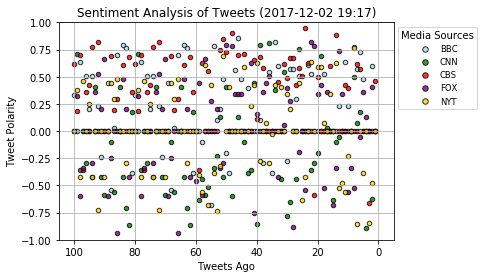

In [17]:
# Build the scatter plots for each city types


plt.scatter(BBC_tweetcount,
            BBC_compound,
            s=20, c="lightblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="BBC")

plt.scatter(CNN_tweetcount,
            CNN_compound,
            s=20, c="green",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="CNN")

plt.scatter(CBS_tweetcount,
            CBS_compound,
            s=20, c="red",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="CBS")

plt.scatter(FOX_tweetcount,
            FOX_compound,
            s=20, c="purple",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="FOX")


plt.scatter(NYT_tweetcount,
            NYT_compound,
            s=20, c="gold",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="NYT")

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((105, -5))
plt.ylim((-1, 1))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc="best", title="Media Sources",
                  labelspacing=0.5, bbox_to_anchor=(1, 1))

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]


# Incorporate a text label regarding circle size
#plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Media.png")

# Show plot
plt.show()

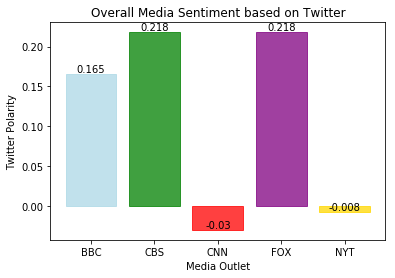

In [22]:
media_group = ["BBC", "CBS", "CNN", "FOX", "NYT"]
compound = [0.165, 0.218, -0.030, 0.218, -0.008]

plt.title("Overall Media Sentiment based on Twitter")
plt.xlabel("Media Outlet")
plt.ylabel("Twitter Polarity")


barlist = plt.bar(media_group, compound, alpha=0.75, align="center")
barlist[0].set_color('lightblue')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('purple')
barlist[4].set_color('gold')


def autolabel(barlist):
    """
    Attach a text label above each bar displaying its height
    """
    counter = 0
    for rect in barlist.get_children():

        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height, compound[counter],
                 ha='center', va='bottom')
        counter += 1


autolabel(barlist)


#plt.xticks(tick_locations, gyms)
plt.show()